In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
path="train_lyst1720633824458.csv"
data_train=pd.read_csv(path)

In [3]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data_train.shape

(14999, 9)

In [5]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)

In [6]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [7]:
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [8]:
column_vidid=data_train["vidid"]

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
data_train['duration']=LabelEncoder().fit_transform(data_train["duration"])
data_train['vidid']=LabelEncoder().fit_transform(data_train["vidid"])
data_train['published']=LabelEncoder().fit_transform(data_train["published"])


In [11]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [12]:
import datetime
import time

In [13]:
def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    P=["H","M","S"]
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h=mm
                mm=''
            elif(i=="M"):
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if(h==''):
        h='00'
    if(m==''):
        m='00'
    if(s==''):
        s='00'
    bp=h+':'+m+':'+s
    return bp


In [14]:
train=pd.read_csv("train.csv")
mp=pd.read_csv(path)["duration"]
time=mp.apply(checki)

In [15]:
def func_sec(time_string):
    h,m,s=time_string.split(':')
    return int(h)*3600+int(m)*60+int(s)

In [16]:
time1=time.apply(func_sec)

In [17]:
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


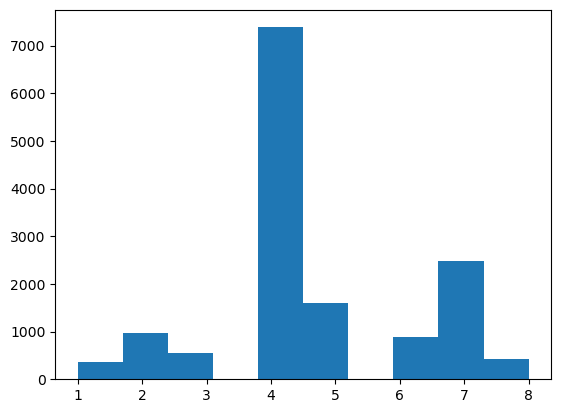

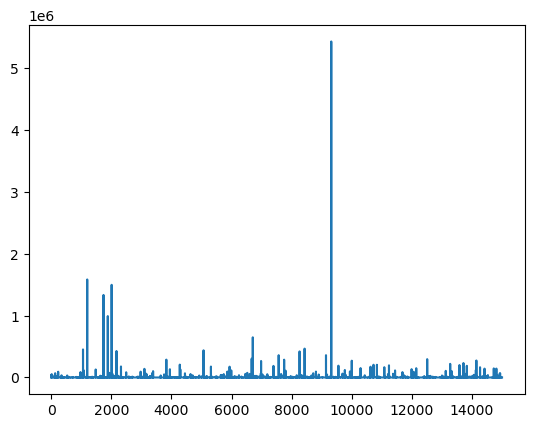

In [18]:
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [19]:
data_train=data_train[data_train["adview"]<2000000]

In [20]:
import seaborn as sns

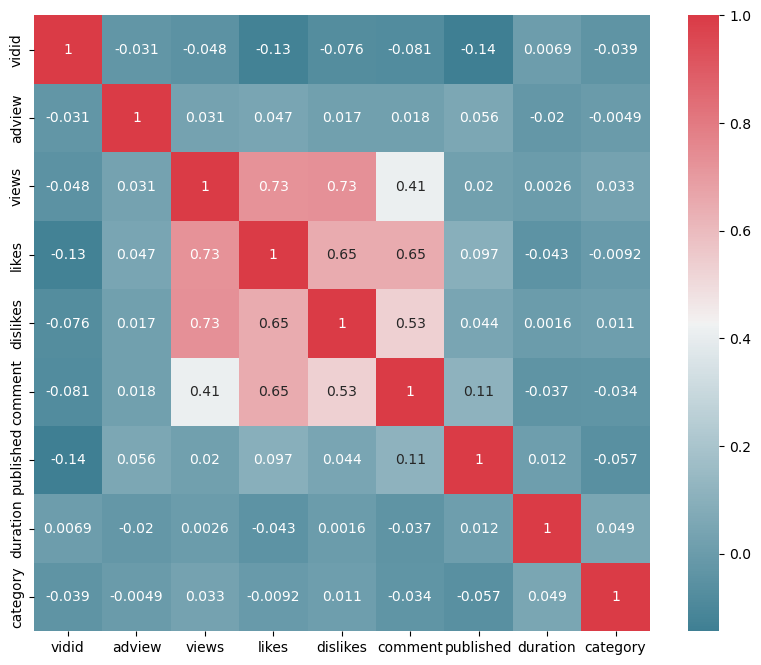

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()

mask = np.zeros_like(corr, dtype=np.bool_)
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

In [22]:
Y_train=pd.DataFrame(data=data_train.iloc[:,1].values,columns=['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape


(11708, 7)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def print_error(X_test,y_test,model_name):
    prediction= model_name.predict(X_test)
    print('Mean Absolute Error:',mean_absolute_error(y_test,prediction))
    print('Mean Sqaured Error:',mean_squared_error(y_test,prediction))
    print('Root Mean Sqaured Error:',np.sqrt(mean_squared_error(y_test,prediction)))

In [26]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
print_error(X_test, Y_test, linear_regression)

Mean Absolute Error: 3707.3780058245306
Mean Sqaured Error: 835663131.1210337
Root Mean Sqaured Error: 28907.83857573986


In [27]:
print(Y_test.shape[0])
print(X_test.shape[0])

2928
2928


In [28]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train,Y_train)
print_error(X_test,Y_test,decision_tree)


Mean Absolute Error: 2834.1106557377047
Mean Sqaured Error: 1199575162.8907104
Root Mean Sqaured Error: 34634.88361306719


In [29]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,Y_train)
print_error(X_test,Y_test, random_forest)

C:\Users\SRIMANNARAYANA ADAPA\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 3375.860244939601
Mean Sqaured Error: 716012845.2124584
Root Mean Sqaured Error: 26758.416343506924


In [30]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,Y_train)
print_error(X_test,Y_test, linear_regression)

C:\Users\SRIMANNARAYANA ADAPA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.3780058245306
Mean Sqaured Error: 835663131.1210337
Root Mean Sqaured Error: 28907.83857573986


In [31]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,Y_train,epochs=100)
ann.summary()
print_error(X_test,Y_test,ann)

C:\Users\SRIMANNARAYANA ADAPA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1065410048.0000 - mean_squared_error: 1065410048.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 582655488.0000 - mean_squared_error: 582655488.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 908488640.0000 - mean_squared_error: 908488640.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 874188224.0000 - mean_squared_error: 874188224.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 640998016.0000 - mean_squared_error: 640998016.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 832790784.0000 - mean_squared_error: 832790784.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 802978816.0000 - mean_squared_error: 802978816.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 384465408.0000 - mean_squared_error: 384465408.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 796367680.0000 - mean_squared_err

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Mean Absolute Error: 3307.514179224525
Mean Sqaured Error: 829782385.404855
Root Mean Sqaured Error: 28805.943577755876


In [32]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
ann.save("ann_youtubeadview.h5")

In [33]:
new_data=pd.read_csv("test.csv")
new_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [34]:
x=new_data.iloc[:,1:7]
new_data['published']=LabelEncoder().fit_transform(new_data["published"])

In [35]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
new_data["category"]=new_data["category"].map(category)

In [36]:
new_data=new_data[new_data.views!='F']
new_data=new_data[new_data.likes!='F']
new_data=new_data[new_data.dislikes!='F']
new_data=new_data[new_data.comment!='F']

In [37]:
new_data["views"]=pd.to_numeric(new_data["views"])
new_data["comment"]=pd.to_numeric(new_data["comment"])
new_data["likes"]=pd.to_numeric(new_data["likes"])
new_data["dislikes"]=pd.to_numeric(new_data["dislikes"])

In [38]:
new_data.info

<bound method DataFrame.info of           vidid    views  likes  dislikes  comment  published    duration  \
0      VID_1054   440238   6153       218     1377       2055     PT7M29S   
1     VID_18629  1040132   8171       340     1047       1827     PT6M29S   
2     VID_13967    28534     31        11        1       1010    PT37M54S   
3     VID_19442  1316715   2284       250      274        117     PT9M55S   
4       VID_770  1893173   2519       225      116       1894      PT3M8S   
...         ...      ...    ...       ...      ...        ...         ...   
8759   VID_2944   111205    471        14      101        232     PT3M14S   
8760   VID_8195  1074457   1024       195       65       1802  PT2H18M35S   
8761  VID_18973  1891692   4606      1109      191       1825     PT7M14S   
8762   VID_5849   714859   1639       151      382       1730     PT3M15S   
8763   VID_8494     5297     12         1        0       1998    PT10M14S   

      category  
0            2  
1        

In [39]:
new_data['duration']=LabelEncoder().fit_transform(new_data["duration"])
new_data['vidid']=LabelEncoder().fit_transform(new_data["vidid"])
new_data['published']=LabelEncoder().fit_transform(new_data["published"])

In [40]:
new_data=new_data.drop(["vidid"],axis=1)

In [41]:
new_data.head()
x=new_data.iloc[:,:]
x

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,2115,2
1,1040132,8171,340,1047,1825,2055,6
2,28534,31,11,1,1009,1506,4
3,1316715,2284,250,274,116,2265,7
4,1893173,2519,225,116,1892,1625,2
...,...,...,...,...,...,...,...
8759,111205,471,14,101,231,1572,3
8760,1074457,1024,195,65,1800,1116,4
8761,1891692,4606,1109,191,1823,2100,6
8762,714859,1639,151,382,1728,1573,4


In [42]:
ad=decision_tree.predict(x)

C:\Users\SRIMANNARAYANA ADAPA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [43]:
ad

array([58., 58., 58., ..., 58., 58., 58.])

In [44]:
for i in ad:
    print(i)

58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
6.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
58.0
5

In [45]:
random_add=random_forest.predict(x)

C:\Users\SRIMANNARAYANA ADAPA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [46]:
def predi(method_name_test):
    for i in method_name_test:
        print(i)

In [47]:
svm_pred_test=linear_regression.predict(x)
for i in svm_pred_test:
    print(i)


C:\Users\SRIMANNARAYANA ADAPA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


[7.39442506e+09]
[1.71202359e+10]
[4.50457425e+08]
[2.11447844e+10]
[3.03866332e+10]
[2.33403963e+09]
[2.21035835e+08]
[75375037.45637138]
[1.06990651e+10]
[9.24633763e+09]
[1.83031688e+10]
[2.59755176e+09]
[1.95039356e+08]
[42949657.46155045]
[1.71770244e+09]
[3.60232462e+08]
[1.97701891e+09]
[5.1705352e+09]
[95466566.17940167]
[3.66520942e+09]
[2.3014555e+08]
[92504825.15928665]
[7.65281802e+09]
[3.39621653e+09]
[4.70974002e+09]
[1.16332176e+09]
[2.36898173e+08]
[4.42352113e+10]
[7.16103228e+09]
[1.07944955e+09]
[2.70677942e+09]
[5.17303695e+08]
[2.27762993e+10]
[-3772536.69325099]
[8.33681598e+08]
[2.2055567e+10]
[1.47815211e+09]
[2.39770613e+09]
[4.25624197e+10]
[1.92929574e+08]
[1.09683829e+11]
[8.17741818e+10]
[3.35811839e+08]
[1.42931499e+10]
[2.2439064e+09]
[2.5579693e+09]
[1.16990032e+10]
[1.77035024e+10]
[5.50024459e+10]
[6.77723471e+08]
[1.3761059e+09]
[4.03538209e+09]
[3.86539393e+09]
[3.81540887e+09]
[5.96280862e+08]
[8.3863674e+08]
[5.29023039e+09]
[1.79678931e+10]
[1.139